In [2]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib as mlt
import matplotlib.pyplot as plt

In [4]:
adata = sc.read_h5ad("Data/Output_240308_adata_scvi_random_sampleID.h5ad")

In [10]:
# cluster main dictionary
leiden_0p6_cluster_main_dict_new = {
    'Ext': ['12', '29', '25', '16', '17', '14', '36', '22', '5', '10', '1', '15', '34', '35'],
    'Inh': ['21', '28', '8', '31', '6', '7', '19', '20', '23'],
    'Astro': ['2', '27'],
    'Micro': ['39', '13'],
    'Oligo': ['0', '38'],
    'OPC': ['9', '32'],
    'RG': ['4', '18', '37'],
    'Neuroblast': ['11','33','3','24','26' ],
    'Vascular': ['30'],
    'Others': ['40'],
}

# reversed dictionary
reversed_new = {}
for value, keys in leiden_0p6_cluster_main_dict_new.items():
    for key in keys:
        reversed_new[key] = value

In [11]:
adata.obs['Cell Type'] = adata.obs["leiden_0.6"].map(reversed_new)
adata.obs['Cell Type']

10X119_2:TCGTACCCAGACAAAT              RG
10X119_2:AGAGCGACACCGCTAG              RG
10X119_2:AAGGAGCGTTGAGTTC      Neuroblast
10X119_2:ATAGACCAGGGTGTTG              RG
10X119_2:TTAGGCATCCGAACGC              RG
                                  ...    
hsDG99HC_TTTGTTGGTTCATCTT-1         Micro
hsDG99HC_TTTGTTGTCATCTATC-1         Oligo
hsDG99HC_TTTGTTGTCCTCGATC-1           Ext
hsDG99HC_TTTGTTGTCGTTAGAC-1         Oligo
hsDG99HC_TTTGTTGTCTCGTCAC-1         Astro
Name: Cell Type, Length: 393060, dtype: object

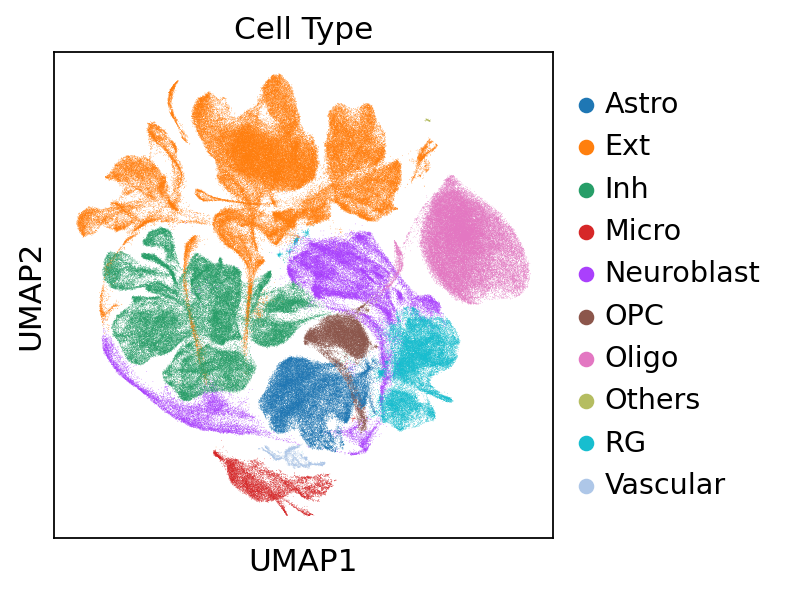

In [7]:
sc.settings.n_jobs = 30
sc.set_figure_params(figsize=(4,4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

sc.pl.umap(adata, color='Cell Type')

In [12]:
adata2 = sc.read_h5ad("Data/Output_231215_adata_scvi_random_sampleID.h5ad")

In [13]:
adata2

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'X_scvi_batch', 'X_scvi_labels', 'leiden_scvi', 'Leiden'
    uns: 'Brain_Region3_colors', 'Brain_Region_colors', 'Leiden_colors', 'Stage2_colors', 'Stage_colors', 'cluster_main2_colors', 'cluster_main_colors', 'leiden_scvi_colors', 'log1p'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts', 'scaled'

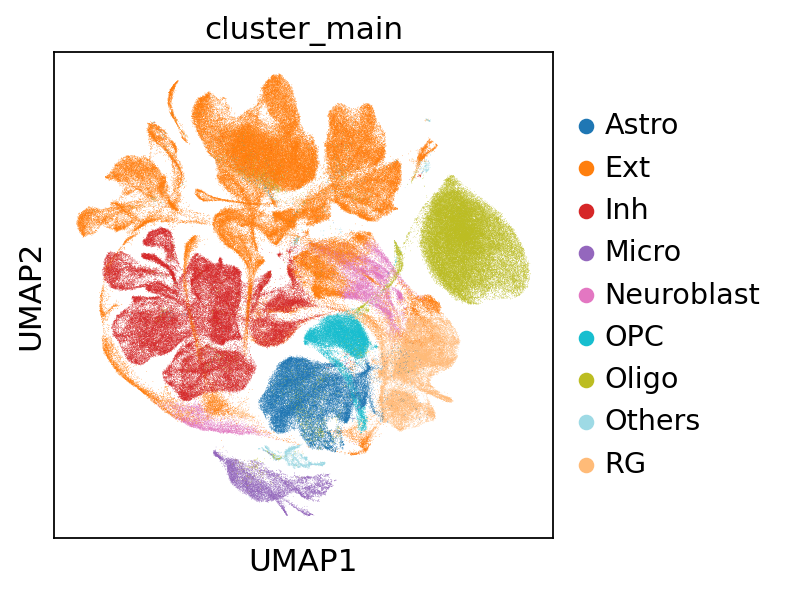

In [19]:
sc.pl.umap(adata2, color = "cluster_main")

In [18]:
adata2.uns["cluster_main_colors"]

array(['#1f77b4ff', '#ff7f0eff', '#d62728ff', '#9467bdff', '#e377c2ff',
       '#17becfff', '#bcbd22ff', '#9edae5ff', '#ffbb78ff'], dtype=object)

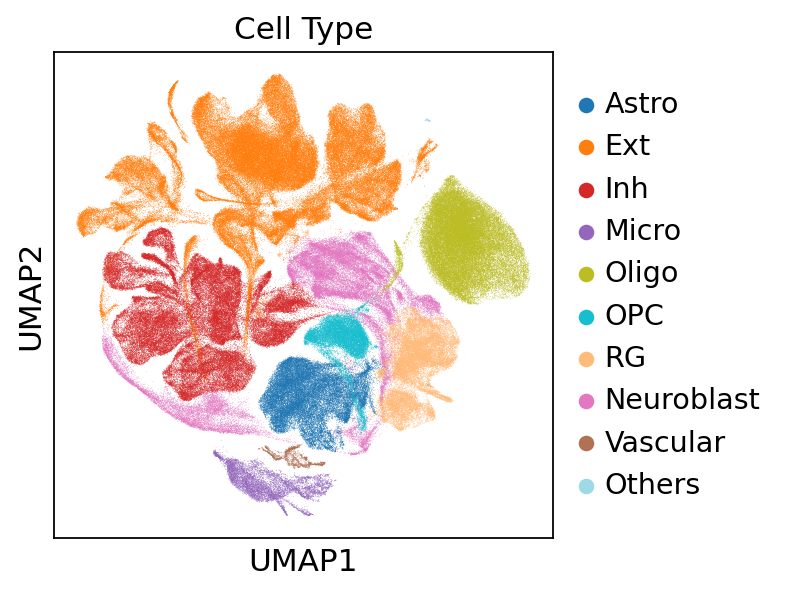

In [28]:
sc.set_figure_params(vector_friendly=True)
celltype_dict_stage = {
            'Astro': '#1f77b4ff',
            'Ext': '#ff7f0eff',
            'Inh': '#d62728ff',
            'Micro': '#9467bdff',
            'Oligo': '#bcbd22ff',
            'OPC': '#17becfff',
            'RG': '#ffbb78ff',    
            'Neuroblast': '#e377c2ff',
            'Vascular': '#b07154',
            'Others': '#9edae5ff',
            }

adata.obs['Cell Type'] = pd.Categorical(adata.obs['Cell Type'], categories=celltype_dict_stage.keys(), ordered=True)

sc.pl.umap(adata, color='Cell Type', palette=celltype_dict_stage)

In [5]:
adata_c35 = adata[adata.obs["Leiden"] == "C35"].copy()
adata_c35.obs["Dataset"].value_counts()

Turecki     1180
ZhangPD       86
Morabito      32
Hardwick       2
Name: Dataset, dtype: int64

In [7]:
adata_c35.obs.columns

Index(['batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI',
       'Hemisphere', 'Library', 'Brain Region', 'Dataset', 'Sex', 'Diagnosis',
       'cluster_original', 'n_genes', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'doublet_scores',
       'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_0.6',
       'cluster_annotated', 'Leiden', 'Cell Type'],
      dtype='object')

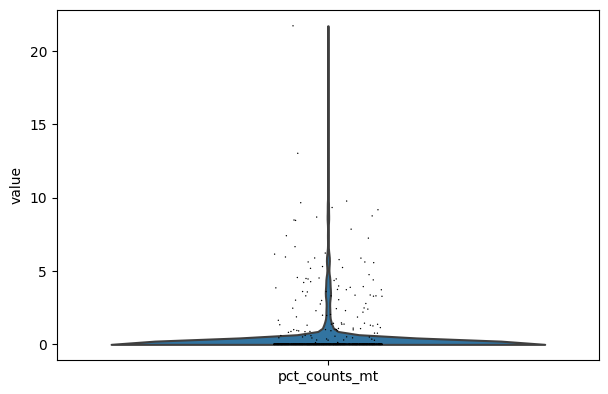

In [8]:
sc.pl.violin(adata_c35, "pct_counts_mt")

In [6]:
adata_c35 = adata[adata.obs["Leiden"] == "C35"].copy()
adata_c35.obs["cluster_original"].value_counts()

Ex_2_L5          867
Mix_1            131
Ex_3_L4_5         67
EX5               63
Mix_4             29
Inhib_7_PVALB     23
ODC12             23
Ex_5_L5           17
Oligos_3          13
Mix_2             11
ODC3               9
Astros_2           7
EX2                6
Micro/Macro        5
ODC8               5
ODC2               4
Endo               3
ODC5               3
EX1                2
Ex_8_L5_6          2
ODC4               1
ODC6               1
Mix_5              1
Ex_9_L5_6          1
ODC1               1
INH1               1
INH2               1
Inhib_6_SST        1
Mix_3              1
Ex_10_L2_4         1
Name: cluster_original, dtype: int64

In [29]:
adata.write_h5ad("Data/Output_240215_adata_scvi_random_sampleID.h5ad")